<a href="https://colab.research.google.com/github/christophergaughan/sample-work/blob/master/PCA_demo_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) Using RNA-Seq Data: Addressing the Curse of Dimensionality

When dealing with large datasets, such as those generated from RNA-Seq experiments, one common challenge is the "Curse of Dimensionality". This term refers to the various problems that arise when analyzing and organizing data in high-dimensional spaces (often hundreds or thousands of variables). These challenges include, but are not limited to, increased computational burden, overfitting, and a decrease in model performance.

Principal Component Analysis (PCA) is a powerful technique used to tackle this problem. It works by transforming the original data into a new set of variables, the principal components (PCs), which are uncorrelated and which capture the most significant variance in the data. In simple terms, PCA helps to reduce the dimensionality of the data (reducing the number of variables), while retaining as much of the variability in the dataset as possible.

The primary goal of PCA in the context of RNA-Seq data is to identify patterns in the expression levels across genes and samples and to highlight similarities and differences. This can be particularly useful when the data is too complex to be analyzed manually or with traditional methods due to the high number of dimensions.

But how does one go about deciding which components to keep and which to discard? And more importantly, how do we explain the concept and implications of dimensionality reduction through PCA to stakeholders or colleagues who may not be familiar with the algorithm? These are crucial questions, especially in data-driven fields where interpretability and transparency are as important as the analytical method itself.

In this notebook, we will explore PCA in the context of RNA-Seq data, demonstrating how it can be applied to simplify complex datasets without losing critical information. We will walk through the process step-by-step, ensuring that the rationale behind each decision is clear and understandable, even for those new to PCA.



# Principal Component Analysis (PCA) Using RNA-Seq Data: Addressing the Curse of Dimensionality

## Introduction
- Brief overview of PCA
- Importance of PCA in high-dimensional data analysis
- Specific relevance to RNA-Seq data

## Background
- The Curse of Dimensionality: Definition and implications
- Introduction to RNA-Seq data characteristics
- Why PCA is a suitable method for RNA-Seq data analysis

## PCA Fundamentals
- What is PCA?
- Mathematical foundations of PCA
- Variance, Covariance, and Eigenvalues

## PCA in RNA-Seq Data Analysis
- Preprocessing RNA-Seq data for PCA
- Choosing the number of components
- Interpreting PCA results in the context of RNA-Seq

## Practical Implementation
- Step-by-Step PCA using Python
  - Data loading and preprocessing
  - Implementing PCA with scikit-learn
  - Visualizing PCA results

## Case Study: RNA-Seq Data Analysis
- Applying PCA to a real RNA-Seq dataset
- Discussion of findings
- Limitations and considerations

## Conclusion
- Summary of key takeaways
- Potential applications and future directions
- Final thoughts

## References
- List of cited references and further reading materials


## Brief Overview of PCA

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called Principal Components (PCs).

### The Mathematics of PCA

1. **Standardization**:
   - Given a dataset with $n$ dimensions, standardize each dimension to have a mean of $0$ and a standard deviation of $1$. This is crucial in PCA to ensure that each dimension contributes equally to the analysis.
   - Standardization formula: $Z = \frac{(X - \mu)}{\sigma}$
     - where $X$ is the original value, $\mu$ is the mean, and $\sigma$ is the standard deviation.

2. **Covariance Matrix Computation**:
   - PCA aims to find the directions (Principal Components) that maximize the variance in the dataset.
   - Compute the covariance matrix to understand how each variable in the input data varies from the mean with respect to other variables.
   - Covariance formula: $\text{Cov}(X, Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{n-1}$

3. **Eigenvalue Decomposition**:
   - Eigenvalues and eigenvectors are computed from the covariance matrix. These will determine the principal components.
   - Eigenvectors (principal components) determine the directions of the new feature space.
   - Eigenvalues determine their magnitude. In the context of PCA, the magnitude indicates the amount of variance that can be attributed to each principal component.

4. **Selecting Principal Components**:
   - Arrange the eigenvalues in descending order and choose the top $k$ eigenvectors that correspond to the top $k$ eigenvalues.
   - This step is critical in reducing the dimensionality of the data, with $k$ being the number of dimensions in the new feature subspace.

5. **Transformation**:
   - Transform the original dataset using the selected principal components to obtain the new feature subspace.
   - Transformation formula: $Y = X \times P$
     - where $X$ is the original data, $P$ is the matrix of principal components, and $Y$ is the transformed data.

### PCA in the Context of RNA-Seq Data

In the context of RNA-Seq data, PCA is used to transform the high-dimensional gene expression data into a lower-dimensional space. This helps in visualizing the data, understanding the underlying structure, and identifying patterns such as similarities or differences in gene expression profiles across different samples or conditions.


## Eigenvalue Decomposition and Principal Component Selection

After standardizing the data and computing the covariance matrix, the next crucial steps in PCA involve eigenvalue decomposition and the selection of principal components. Here's how these steps unfold:

### Eigenvalue Decomposition

1. **Compute Eigenvectors and Eigenvalues**:
   - From the covariance matrix $C$, calculate the eigenvectors and eigenvalues.
   - The eigenvectors represent the directions or axes of the new space, and the eigenvalues represent the magnitude or significance of these directions.
   - Eigenvalue decomposition can be represented as: $Cv = \lambda v$
     - where $C$ is the covariance matrix, $v$ represents an eigenvector, and $\lambda$ is the corresponding eigenvalue.

2. **Eigenvector and Eigenvalue Calculation**:
   - The goal is to solve for $v$ (eigenvectors) and $\lambda$ (eigenvalues).
   - This involves solving the characteristic equation, derived from the covariance matrix: $|C - \lambda I| = 0$
     - where $I$ is the identity matrix of the same size as $C$.

### Selection of Principal Components

1. **Ranking the Eigenvalues**:
   - The eigenvalues are sorted in descending order. The corresponding eigenvectors are ranked accordingly.
   - The higher the eigenvalue, the more variance that principal component explains.

2. **Choosing Top k Eigenvectors**:
   - Select the top $k$ eigenvectors, which correspond to the top $k$ eigenvalues.
   - This choice depends on the desired number of dimensions in the reduced dataset.
   - The selected eigenvectors form the matrix $P$ used to transform the data into the new feature space.

3. **Forming Principal Components**:
   - Principal Components (PCs) are formed by the eigenvectors with the highest eigenvalues.
   - The first principal component is the direction in which the data varies the most, the second principal component is orthogonal to the first and is the direction of the next highest variance, and so on.
   - This can be represented as: $PC_i = v_i$, where $v_i$ is the $i$-th eigenvector.

### Transformation to New Feature Space

- Finally, transform the original dataset $X$ using the selected principal components to obtain the transformed data $Y$.
- The transformation can be expressed as: $Y = X \cdot P$
  - where $X$ is the standardized original data, $P$ is the matrix formed by the selected eigenvectors, and $Y$ is the data in the new feature space.

### Applying to RNA-Seq Data

In RNA-Seq data analysis, these steps help in reducing the dimensions from potentially thousands of gene expression levels to a manageable number of principal components, capturing the most significant variance and patterns in the data.


## Computing Eigenvectors of a 4x4 Matrix

To demonstrate how eigenvectors are computed in linear algebra, let's consider a 4x4 matrix $A$. The process involves finding solutions to the characteristic equation and then solving for the eigenvectors.

### Example Matrix

Let's assume a 4x4 matrix $A$:

$$
A = \begin{bmatrix}
a & b & c & d \\
e & f & g & h \\
i & j & k & l \\
m & n & o & p \\
\end{bmatrix}
$$

### Finding Eigenvalues

1. **Characteristic Equation**:
   - The eigenvalues are solutions to the characteristic equation of the matrix $A$, given by $|A - \lambda I| = 0$, where $I$ is the 4x4 identity matrix and $\lambda$ is an eigenvalue.
   - The characteristic equation is a polynomial equation in terms of $\lambda$.

2. **Determinant Calculation**:
   - Expand the determinant of $A - \lambda I$:
   $$
   \begin{vmatrix}
   a - \lambda & b & c & d \\
   e & f - \lambda & g & h \\
   i & j & k - \lambda & l \\
   m & n & o & p - \lambda \\
   \end{vmatrix} = 0
   $$

3. **Solve for $\lambda$**:
   - Solve the above equation to find the values of $\lambda$ (eigenvalues).

### Computing Eigenvectors

1. **Substitute Eigenvalues**:
   - For each eigenvalue $\lambda_i$, substitute back into the equation $A - \lambda_i I$ to form a system of linear equations.

2. **Solve Linear System**:
   - Solve the system $(A - \lambda_i I) \cdot \mathbf{v} = \mathbf{0}$, where $\mathbf{v}$ is the eigenvector corresponding to $\lambda_i$.
   - This typically involves using methods like Gaussian elimination to find non-trivial solutions for $\mathbf{v}$.

3. **Normalize Eigenvectors** (Optional):
   - Often, eigenvectors are normalized to have unit length for convenience.

### Result

- The solutions $\mathbf{v}$ for each $\lambda_i$ are the eigenvectors of the matrix $A$. These eigenvectors form the basis for the eigenspace corresponding to each eigenvalue.

### In the Context of PCA

- In PCA, these steps are performed on the covariance matrix of the data. The resulting eigenvectors are used to transform the data into principal components, reducing dimensionality while retaining significant variance.

This linear algebra process forms the mathematical foundation for PCA and many other data analysis techniques.


## Introduction to RNA-Seq Data Characteristics

RNA-Sequencing (RNA-Seq) is a powerful tool used in molecular biology to study the genome-wide expression patterns of RNA. It helps in understanding the functional elements of the genome, the molecular constituents of cells and tissues, and the dynamics of the cellular transcriptome.

### Key Characteristics of RNA-Seq Data:

1. **High Dimensionality**:
   - RNA-Seq data typically consists of expressions of tens of thousands of genes. This high dimensionality can make data analysis challenging due to the complexity and computational costs involved.

2. **Sparsity**:
   - A significant portion of the data may consist of zero or near-zero expression levels, reflecting genes that are not expressed in the sampled conditions or tissues.

3. **Variability**:
   - Gene expression levels can vary widely among different cells, tissues, or environmental conditions, introducing a high degree of variability in the data.

4. **Biological and Technical Noise**:
   - RNA-Seq data is subject to both biological variability and technical noise, which can influence the analysis and interpretation of the data.

### Why PCA is Suitable for RNA-Seq Data Analysis

Given these characteristics, PCA becomes a particularly useful tool for analyzing RNA-Seq data:

1. **Dimensionality Reduction**:
   - PCA reduces the high-dimensional gene expression data to a lower-dimensional space (principal components), making the data easier to visualize and interpret.

2. **Noise Reduction**:
   - By capturing the most significant variance in the data, PCA can help to filter out noise and focus on the underlying biological signal.

3. **Identifying Patterns**:
   - PCA can reveal patterns in the data that may not be apparent in the high-dimensional space, such as clustering of similar samples or trends across conditions.

4. **Simplifying Complexity**:
   - PCA simplifies the complexity of RNA-Seq data, making it more manageable for further analysis, such as differential expression analysis or clustering.

5. **Exploratory Data Analysis**:
   - PCA serves as an excellent tool for exploratory data analysis, providing an initial overview of the structure and relationships within the data.

By applying PCA to RNA-Seq data, researchers can gain valuable insights into the underlying biological processes and identify areas for deeper investigation.

This combination of RNA-Seq data characteristics and the advantages offered by PCA makes it a widely used method in the field of genomics and transcriptomics analysis.


# Let's load in the data

**In this notebook I will use an application called 'Dask'.**

## Understanding Dask and Its Advantages

Dask is an open-source library for parallel computing in Python that integrates seamlessly with existing Python libraries like NumPy, Pandas, and Scikit-Learn. It is designed to scale Python workflows, enabling you to work with larger-than-memory datasets efficiently.

### Key Features of Dask:

1. **Parallel Computing**:
   - Dask enables parallel computation on large datasets by breaking them into smaller, manageable chunks. It executes operations on these chunks in parallel, utilizing multiple cores of a processor.

2. **Lazy Evaluation**:
   - Dask employs lazy evaluation, where computations are not executed immediately but are queued. This approach allows Dask to optimize and parallelize the computation efficiently.

3. **Scalability**:
   - It scales from single-machine to cluster setups, making it versatile for different computing environments.

4. **Integration with Python Ecosystem**:
   - Dask works well with existing Python libraries, providing familiar interfaces and seamless integration.

### Dask and Pandas: Syntactical Differences

While Dask mimics Pandas' syntax to a large extent, there are some differences due to its parallel nature:

1. **DataFrame Creation**:
   - In Dask, DataFrames are created using `dask.dataframe.from_pandas()` or similar functions for reading from various file formats.
2. **Operations**:
   - Operations on Dask DataFrames are similar to Pandas, but they are executed lazily.
3. **Compute**:
   - To get the result of a computation, you need to call `.compute()` on a Dask DataFrame, as operations are not executed until this method is called.

### Leveraging MacBook Pro with M2 Pro Chipset

My MacBook Pro with an M2 Pro chipset, featuring 10 cores, is highly conducive to parallel computing:

1. **Multi-Core Processing**:
   - The M2 Pro chipset with 10 cores allows Dask to distribute computations across multiple cores, significantly speeding up data processing tasks.
2. **Efficient Memory Management**:
   - The advanced memory architecture of the M2 Pro enhances the handling of large datasets, ensuring smooth and efficient data processing.
3. **Optimized Performance**:
   - With Dask's parallel computation capabilities combined with the M2 Pro's high-performance cores, you can achieve faster processing times, especially beneficial for computationally intensive tasks like PCA on large RNA-Seq datasets.

By utilizing Dask on your MacBook Pro with an M2 Pro chipset, you can harness the full potential of parallel computing to process large datasets more efficiently than traditional single-threaded methods.

This setup is particularly advantageous for handling high-dimensional data like RNA-Seq, where Dask's ability to manage large datasets and your MacBook's processing power can significantly reduce computation time and enhance data analysis workflow.


In [ ]:
from dask.distributed import Client

# If you have already created a client instance, restart the cluster
if 'client' in globals():
    client.restart()  # This restarts the cluster the client is connected to
else:
    # If not, create a new client and then restart
    client = Client(n_workers=4, threads_per_worker=1, memory_limit='auto')
    client.restart()

# After the restart, you can confirm that the client is connected and the workers are fresh
print(client)

2023-12-15 17:00:59,621 - distributed.nanny - WARNING - Restarting worker
2023-12-15 17:00:59,644 - distributed.nanny - WARNING - Restarting worker
2023-12-15 17:00:59,646 - distributed.nanny - WARNING - Restarting worker
2023-12-15 17:00:59,660 - distributed.nanny - WARNING - Restarting worker


<Client: 'tcp://127.0.0.1:55985' processes=4 threads=4, memory=6.40 GiB>


In [ ]:
import dask.dataframe as dd

# Load the data from the text file with tab-separated values
# Ensure the file path is correct relative to the notebook's location or provide an absolute path
data = dd.read_csv('/Users/chrisgaughan/Downloads/hepatic_counts_normalized_pt_2.txt', sep='\t')

# Rename the column 'Unnamed: 0' to 'cell_state'
# This operation is lazy; it doesn't compute anything yet
data = data.rename(columns={'Unnamed: 0': 'cell_state'})

# Compute the first 20 rows to confirm the change
# Calling .compute() or .head() will bring the result into memory
# Use .head(n=20, compute=True) if you want to see the first 20 rows without computing the whole DataFrame
first_20_rows = data.head(20, compute=True)
print(first_20_rows)

                  cell_state  Xkr4  Gm1992  Gm37381  Rp1     Sox17  Gm37323  \
0   E75_1_AAATGCCGTCGAACAG-1   0.0     0.0      0.0  0.0  0.903261      0.0   
1   E75_1_AACCATGTCTAACCGA-1   0.0     0.0      0.0  0.0  0.854628      0.0   
2   E75_1_AACCGCGGTGTGCCTG-1   0.0     0.0      0.0  0.0  2.461639      0.0   
3   E75_1_AAGACCTAGTCCATAC-1   0.0     0.0      0.0  0.0  0.277223      0.0   
4   E75_1_ACACCCTGTTGTTTGG-1   0.0     0.0      0.0  0.0  0.000000      0.0   
5   E75_1_ACAGCTAAGACACGAC-1   0.0     0.0      0.0  0.0  0.330360      0.0   
6   E75_1_ACAGCTAGTGTGAAAT-1   0.0     0.0      0.0  0.0  0.000000      0.0   
7   E75_1_ACGAGCCCAGTCGATT-1   0.0     0.0      0.0  0.0  0.339859      0.0   
8   E75_1_ACGTCAAGTCGAACAG-1   0.0     0.0      0.0  0.0  0.283062      0.0   
9   E75_1_AGGCCACCAAGGTGTG-1   0.0     0.0      0.0  0.0  1.247754      0.0   
10  E75_1_AGTGTCATCCAGAAGG-1   0.0     0.0      0.0  0.0  1.641969      0.0   
11  E75_1_CAACCAAGTCGGATCC-1   0.0     0.0      0.0 

In [ ]:
# Rename the column 'Unnamed: 0' to 'cell_state' and assign the result to `data`
data = data.rename(columns={'Unnamed: 0': 'cell_state'})

# Compute and display the first 20 rows to confirm the change
print(data.head(20))


                  cell_state  Xkr4  Gm1992  Gm37381  Rp1     Sox17  Gm37323  \
0   E75_1_AAATGCCGTCGAACAG-1   0.0     0.0      0.0  0.0  0.903261      0.0   
1   E75_1_AACCATGTCTAACCGA-1   0.0     0.0      0.0  0.0  0.854628      0.0   
2   E75_1_AACCGCGGTGTGCCTG-1   0.0     0.0      0.0  0.0  2.461639      0.0   
3   E75_1_AAGACCTAGTCCATAC-1   0.0     0.0      0.0  0.0  0.277223      0.0   
4   E75_1_ACACCCTGTTGTTTGG-1   0.0     0.0      0.0  0.0  0.000000      0.0   
5   E75_1_ACAGCTAAGACACGAC-1   0.0     0.0      0.0  0.0  0.330360      0.0   
6   E75_1_ACAGCTAGTGTGAAAT-1   0.0     0.0      0.0  0.0  0.000000      0.0   
7   E75_1_ACGAGCCCAGTCGATT-1   0.0     0.0      0.0  0.0  0.339859      0.0   
8   E75_1_ACGTCAAGTCGAACAG-1   0.0     0.0      0.0  0.0  0.283062      0.0   
9   E75_1_AGGCCACCAAGGTGTG-1   0.0     0.0      0.0  0.0  1.247754      0.0   
10  E75_1_AGTGTCATCCAGAAGG-1   0.0     0.0      0.0  0.0  1.641969      0.0   
11  E75_1_CAACCAAGTCGGATCC-1   0.0     0.0      0.0 

In [ ]:
# Extract time point from cell_state and store in a new column
data['time_point'] = data['cell_state'].str.extract(r'(^E\d{2,3})', expand=False)

# Compute and display the first few rows to confirm the changes
print(data.head())


                 cell_state  Xkr4  Gm1992  Gm37381  Rp1     Sox17  Gm37323  \
0  E75_1_AAATGCCGTCGAACAG-1   0.0     0.0      0.0  0.0  0.903261      0.0   
1  E75_1_AACCATGTCTAACCGA-1   0.0     0.0      0.0  0.0  0.854628      0.0   
2  E75_1_AACCGCGGTGTGCCTG-1   0.0     0.0      0.0  0.0  2.461639      0.0   
3  E75_1_AAGACCTAGTCCATAC-1   0.0     0.0      0.0  0.0  0.277223      0.0   
4  E75_1_ACACCCTGTTGTTTGG-1   0.0     0.0      0.0  0.0  0.000000      0.0   

     Mrpl15    Lypla1  Gm37988  ...  AC125149.2  AC125149.4  AC234645.1  \
0  1.204348  0.301087      0.0  ...         0.0         0.0         0.0   
1  1.424380  0.854628      0.0  ...         0.0         0.0         0.0   
2  1.230820  0.410273      0.0  ...         0.0         0.0         0.0   
3  1.386117  0.831670      0.0  ...         0.0         0.0         0.0   
4  0.779727  0.000000      0.0  ...         0.0         0.0         0.0   

   AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  Vmn2r122  \
0         0.0

In [ ]:
data_cleaned = data.drop(columns="cell_state")
total_nan = data_cleaned.isnull().sum().sum()
print(f"Total number of NaN values in the dataset: {total_nan}")


Total number of NaN values in the dataset: dd.Scalar<series-..., dtype=int64>


In [ ]:
# Assuming data_cleaned is a Dask DataFrame
non_numeric_cols = data_cleaned.select_dtypes(exclude=['number']).columns

# Compute unique non-numeric values for each column
for col in non_numeric_cols:
    unique_values = data_cleaned[col].drop_duplicates().compute()
    print(f"Column '{col}' has non-numeric values:", unique_values)


Column 'time_point' has non-numeric values: 0       E75
129     E85
359     E95
323    E105
Name: time_point, dtype: object


In [ ]:
# Exclude 'cell_state' or any other non-relevant columns
data_for_pca = data.drop(columns=['cell_state'])

In [ ]:
# Check the data types of all columns
print(data_for_pca.dtypes)

Xkr4              float64
Gm1992            float64
Gm37381           float64
Rp1               float64
Sox17             float64
                   ...   
AC149090.1        float64
CAAA01118383.1    float64
Vmn2r122          float64
CAAA01147332.1    float64
time_point         object
Length: 31054, dtype: object


In [ ]:
# Exclude the 'time_point' column from the PCA analysis
data_for_pca = data_for_pca.drop(columns=['time_point'])

In [ ]:
from dask.distributed import Client, LocalCluster

# Create a local cluster with specific settings
cluster = LocalCluster(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client = Client(cluster)

/Users/chrisgaughan/anaconda3/envs/nat_data3/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56163 instead
  warnings.warn(


In [ ]:
from dask_ml.decomposition import PCA

# Define the number of components for PCA
n_components = 5  # Adjust based on your needs

# Initialize PCA with the chosen number of components and a specified SVD solver
pca = PCA(n_components=n_components, svd_solver='randomized')

# Fit PCA on the dataset and transform it
pca_result = pca.fit_transform(data_for_pca)

# To compute and view the results (ensure you have enough memory before calling .compute())
# pca_result.compute()


2023-12-15 17:04:50,045 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 1.55 GiB -- Worker memory limit: 1.86 GiB
2023-12-15 17:04:50,432 - distributed.worker.memory - WARNING - Worker is at 74% memory usage. Resuming worker. Process memory: 1.38 GiB -- Worker memory limit: 1.86 GiB
2023-12-15 17:04:50,432 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.38 GiB -- Worker memory limit: 1.86 GiB


In [ ]:
# Compute chunk sizes for the PCA result
pca_result = pca_result.compute_chunk_sizes()

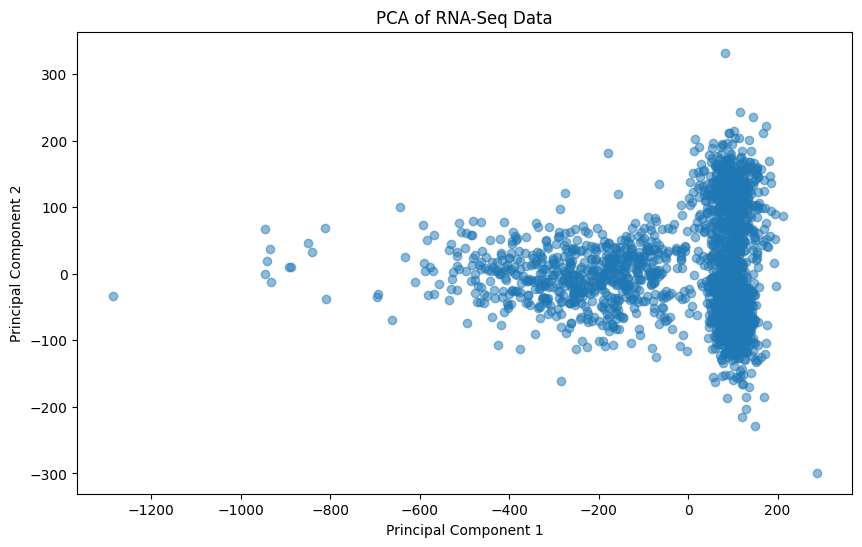

In [ ]:
import matplotlib.pyplot as plt

# Extract the first two principal components
pc1 = pca_result[:, 0].compute()
pc2 = pca_result[:, 1].compute()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of RNA-Seq Data')
plt.show()

## Scree Plot- This scree plot looks rather unusual and lacks the typical elbow shape that charcterizes most scree plots

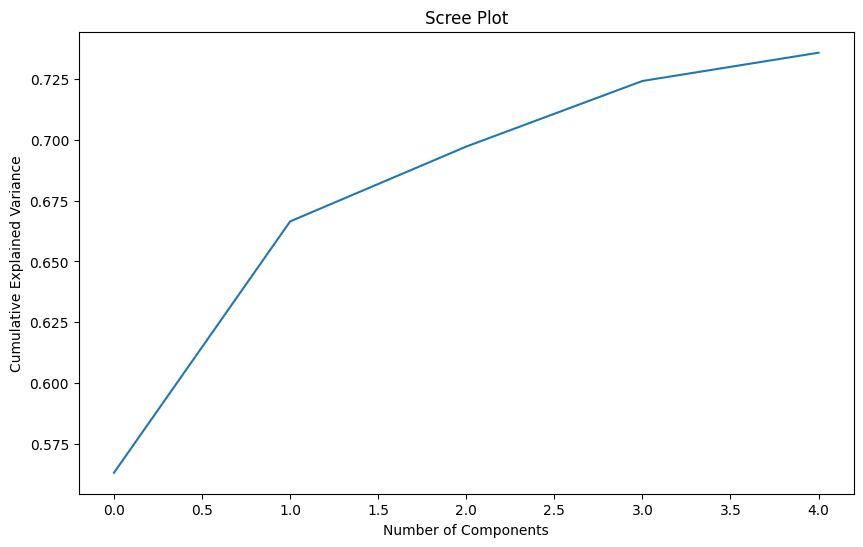

In [ ]:
import numpy as np

explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_var))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Compute the number of rows in the DataFrame first
num_rows = data_cleaned.shape[0].compute()

chunk_size = 1000  # Define a comfortable chunk size for your system

# Create a list to hold chunks of the array
chunks = []

# Iterate through the Dask DataFrame in chunks
for start in range(0, num_rows, chunk_size):
    # Compute only the chunk
    chunk = data_cleaned.loc[start:start + chunk_size].compute()
    # Convert to numpy and append to list
    chunks.append(chunk.to_numpy())

# Concatenate the numpy arrays from each chunk into one final array
data_array = np.concatenate(chunks, axis=0)

2023-12-15 17:14:19,957 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,144 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,208 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,294 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,379 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,588 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,655 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-12-15 17:14:20,719 - distributed.utils_perf - WARNING - full garbage collections took

2023-12-15 17:22:24,069 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 0 memory: 1107 MB fds: 491>>
Traceback (most recent call last):
  File "/Users/chrisgaughan/anaconda3/envs/nat_data3/lib/python3.9/site-packages/tornado/ioloop.py", line 919, in _run
    val = self.callback()
  File "/Users/chrisgaughan/anaconda3/envs/nat_data3/lib/python3.9/site-packages/distributed/system_monitor.py", line 168, in update
    net_ioc = psutil.net_io_counters()
  File "/Users/chrisgaughan/anaconda3/envs/nat_data3/lib/python3.9/site-packages/psutil/__init__.py", line 2109, in net_io_counters
    rawdict = _psplatform.net_io_counters()
OSError: [Errno 12] Cannot allocate memory


In [ ]:
# Exclude the non-numeric column 'time_point' or any other non-numeric columns
numeric_data_cleaned = data_cleaned.drop(columns=['time_point'])

# Now you can compute and convert the Dask DataFrame to a Pandas DataFrame
numeric_data_pandas = numeric_data_cleaned.compute()

# Apply StandardScaler to the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data_pandas)

2023-12-15 22:46:56,901 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-12-15 22:46:56,988 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-12-15 22:46:57,018 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-12-15 22:46:57,149 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 22:46:57,221 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-12-15 22:46:57,286 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-12-15 22:46:57,348 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-12-15 22:46:57,361 - distributed.utils_perf - WARNING - full garbage collections took

## The below scree plot looks even worse, showing just a line without the typical elbow shape that a normal scree plot uses, we will now process the data differently to see if we can get a scree plot that looks more as expected

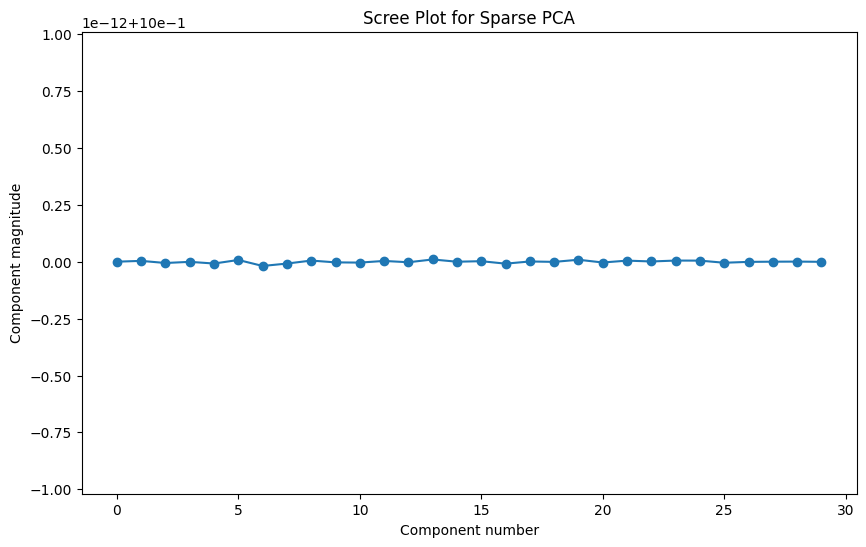

In [ ]:
from sklearn.decomposition import SparsePCA

# Initialize SparsePCA with your choice of n_components
# Here, we are using 30 components as an example
sparse_pca = SparsePCA(n_components=30, random_state=0, alpha=1e-4)

# Fit SparsePCA to your scaled data
sparse_pca.fit(data_scaled)

# The components_ attribute contains the loadings for each component
# Calculate the magnitude of each component as the sum of squares of the loadings
component_magnitudes = np.sum(sparse_pca.components_**2, axis=1)

# Plot the component magnitudes in a scree plot
plt.figure(figsize=(10, 6))
plt.plot(component_magnitudes, marker='o')
plt.xlabel('Component number')
plt.ylabel('Component magnitude')
plt.title('Scree Plot for Sparse PCA')
plt.show()




In [ ]:
# Create a DataFrame of the loadings
loadings_df = pd.DataFrame(sparse_pca.components_, columns=numeric_data_pandas.columns)

# Inspect the loadings of the first component
loadings_first_component = loadings_df.loc[0].abs().sort_values(ascending=False)

# Print the top 10 genes for the first component
print(loadings_first_component.head(10))



Nedd4      0.031081
Gm10260    0.030560
Eif5a      0.030317
Prdx1      0.030031
Prrc2c     0.029734
Gm11361    0.029668
Gstp1      0.029261
Uqcrq      0.028953
Ttc3       0.028794
Pfn1       0.028678
Name: 0, dtype: float64


/Users/chrisgaughan/anaconda3/envs/nat_data3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


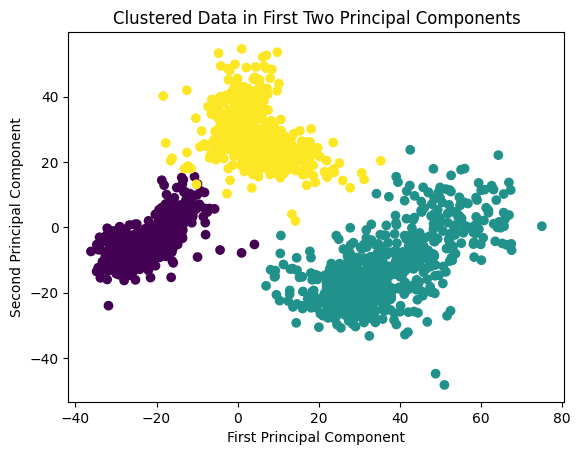

In [ ]:
# Transform the data using the sparse PCA components
transformed_data = sparse_pca.transform(data_scaled)

# Now you can use transformed_data for further analysis, such as clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(transformed_data)

# Plot the clusters to visualize potential groupings
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=clusters)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clustered Data in First Two Principal Components')
plt.show()



2023-12-15 23:00:45,571 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 23:00:52,797 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 23:00:52,886 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 23:00:52,980 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 23:00:53,092 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 23:00:53,449 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-12-15 23:00:57,782 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-12-15 23:00:57,841 - distributed.utils_perf - WARNING - full garbage collections took

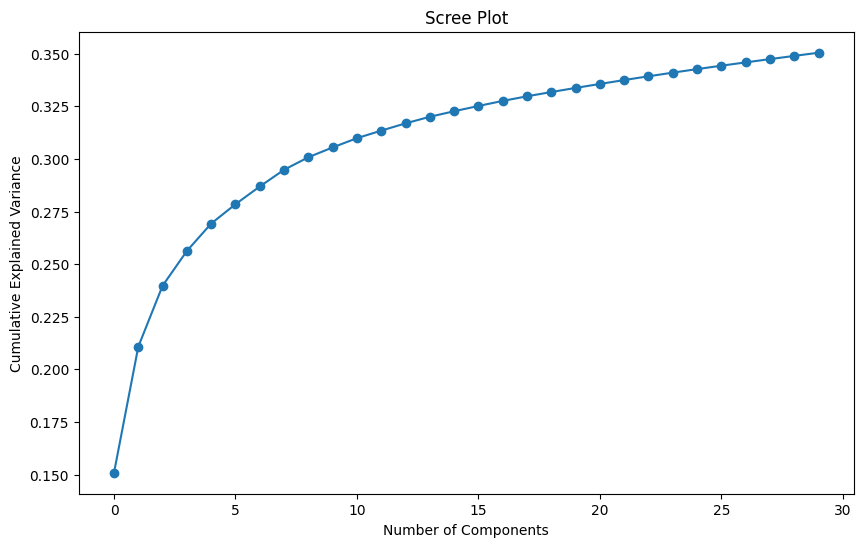

In [ ]:
import dask.dataframe as dd
import numpy as np

# Assuming data_cleaned is a Dask DataFrame with numeric columns only
# If not, you need to convert non-numeric columns with numeric content to numeric dtype
# and filter out truly non-numeric columns like IDs or categorical variables
numeric_data_cleaned = data_cleaned.select_dtypes(include=[np.number])

# Now, you can safely apply log1p since all columns are numeric
data_log_normalized = numeric_data_cleaned.map_partitions(lambda df: np.log1p(df))

# Let's proceed with the rest of your analysis
# First, compute the variance of each gene to filter low variance genes
variances = data_log_normalized.var()

# Set a variance threshold for filtering
variance_threshold = 0.1
high_variance = variances[variances > variance_threshold].index

# Filter the genes based on the variance threshold
filtered_data = data_log_normalized[high_variance]

# Compute to bring the filtered data into memory as a pandas dataframe
filtered_data_computed = filtered_data.compute()

# Now apply the StandardScaler to the pandas dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(filtered_data_computed)

# Perform PCA on the scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=30)  # Adjust based on the desired number of components
pca.fit(data_scaled)

# Create a scree plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

## Scree Plot Explanation

The latest scree plot represents the cumulative explained variance by the principal components after a different data preparation approach was employed. The plot shows a more typical scree plot shape, where the curve levels off as the number of components increases, indicating that additional components contribute less to explaining the variance in the data.

### Methods Employed for This Scree Plot:

1. **Data Normalization**: Prior to PCA, the data was normalized to ensure that each feature contributes proportionately to the final model. This is a critical step for PCA since it is sensitive to the variances of the data features.

2. **Log Transformation**: A log transformation (`np.log1p`) was applied to the data to manage the skewness in the gene expression levels, which is a common characteristic of RNA-seq data.

3. **Variance Filtering**: Genes with low variance across samples were filtered out before PCA. This step helps to remove noise and focus the analysis on genes that have more expression variability and are more likely to be biologically significant.

4. **Standard Scaling**: After filtering, `StandardScaler` was used to scale the data, giving each feature unit variance and zero mean. This step is crucial for PCA to work correctly.

5. **PCA Application**: PCA was then applied to the scaled data to reduce its dimensionality and to identify the principal components.

6. **Cumulative Variance Calculation**: The cumulative explained variance ratio was calculated for each component to understand how much of the total variance is captured as we increase the number of components.

### Differences from Previous Scree Plots:

- The earlier scree plots showed an unusual distribution of explained variance, with the variance either not leveling off as expected or the magnitudes of the components being uniformly low across all components.

- In contrast, this scree plot shows a more characteristic 'elbow' shape, suggesting that there is a point beyond which additional components do not add much explanatory power. This is indicative of a well-prepared dataset where PCA is effectively capturing the underlying structure.

- The improved scree plot suggests that the data preparation adjustments made—particularly the log transformation and variance filtering—were effective in enhancing the PCA analysis, leading to more interpretable results.

This scree plot is a better representation of the typical outcomes expected from PCA on a high-dimensional dataset and can guide the selection of an optimal number of principal components for further analysis.


In [ ]:
# Perform PCA
pca = PCA(n_components=30)  # Assuming we select 30 components based on the scree plot
pca_transformed_data = pca.fit_transform(data_scaled)




## K-Means Clustering

/Users/chrisgaughan/anaconda3/envs/nat_data3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


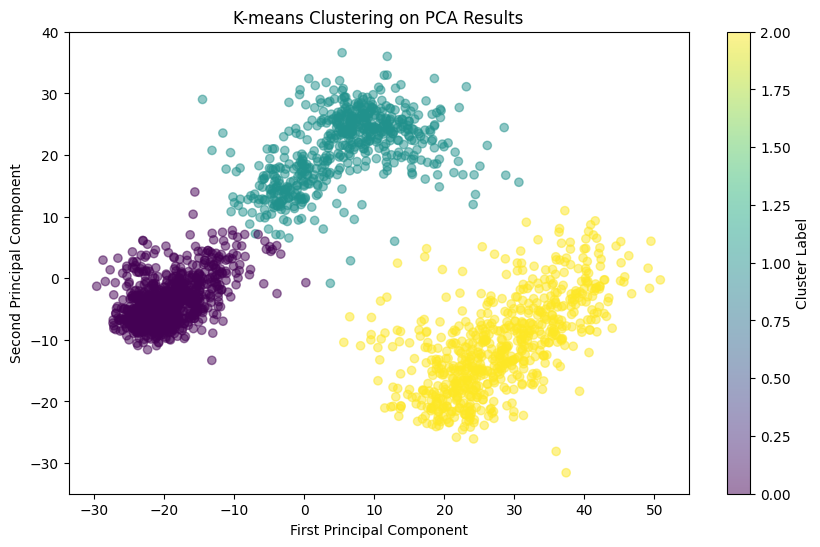

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Let's assume we choose 3 clusters
cluster_labels = kmeans.fit_predict(pca_transformed_data)

# Plot the K-means clustering result on the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on PCA Results')
plt.colorbar(label='Cluster Label')
plt.show()



## Interpretation of K-means Clustering on PCA Results

The K-means clustering algorithm has been applied to the dataset after dimensionality reduction via PCA. The results are visualized using the first two principal components, and here's how to interpret this visualization:

### Cluster Visualization

- The scatter plot shows the data points in the space defined by the first two principal components.
- Each color represents a different **cluster** as identified by the K-means algorithm.
- Data points that are close together in this space and share the same color are considered to be in the same cluster.

### Understanding the Clusters

- **Grouping**: Points in the same cluster are similar to each other in terms of their gene expression profiles (as reduced to the principal components).
- **Differences**: Points in different clusters are dissimilar, indicating distinct expression patterns or underlying biological states.
- **Cluster Boundaries**: The way clusters are separated in the plot can give insights into how distinct different groups or conditions are in the dataset.

### Implications for Biological Interpretation

- **Biological Significance**: Each cluster may correspond to a different biological state, condition, or cell type, depending on the nature of the RNA-Seq experiment and the samples analyzed.
- **Further Analysis**: It's important to correlate these clusters with external biological knowledge, such as experimental conditions, to derive meaningful biological insights.

### Caveats and Considerations

- **Number of Clusters**: The chosen number of clusters (in this case, `n_clusters`) can significantly impact the analysis. Techniques like the Elbow method or Silhouette analysis can help in determining an appropriate number of clusters.
- **Data Complexity**: While PCA helps in reducing dimensionality, it may also lead to loss of information. Clustering results should be interpreted with an understanding that they represent patterns in the reduced dimensionality space.
- **Validation**: It's crucial to validate the clusters, either using external data or specific validation metrics, to ensure they reflect real patterns in the data and are not artifacts of the chosen methods or parameters.


## Construct a pair plot

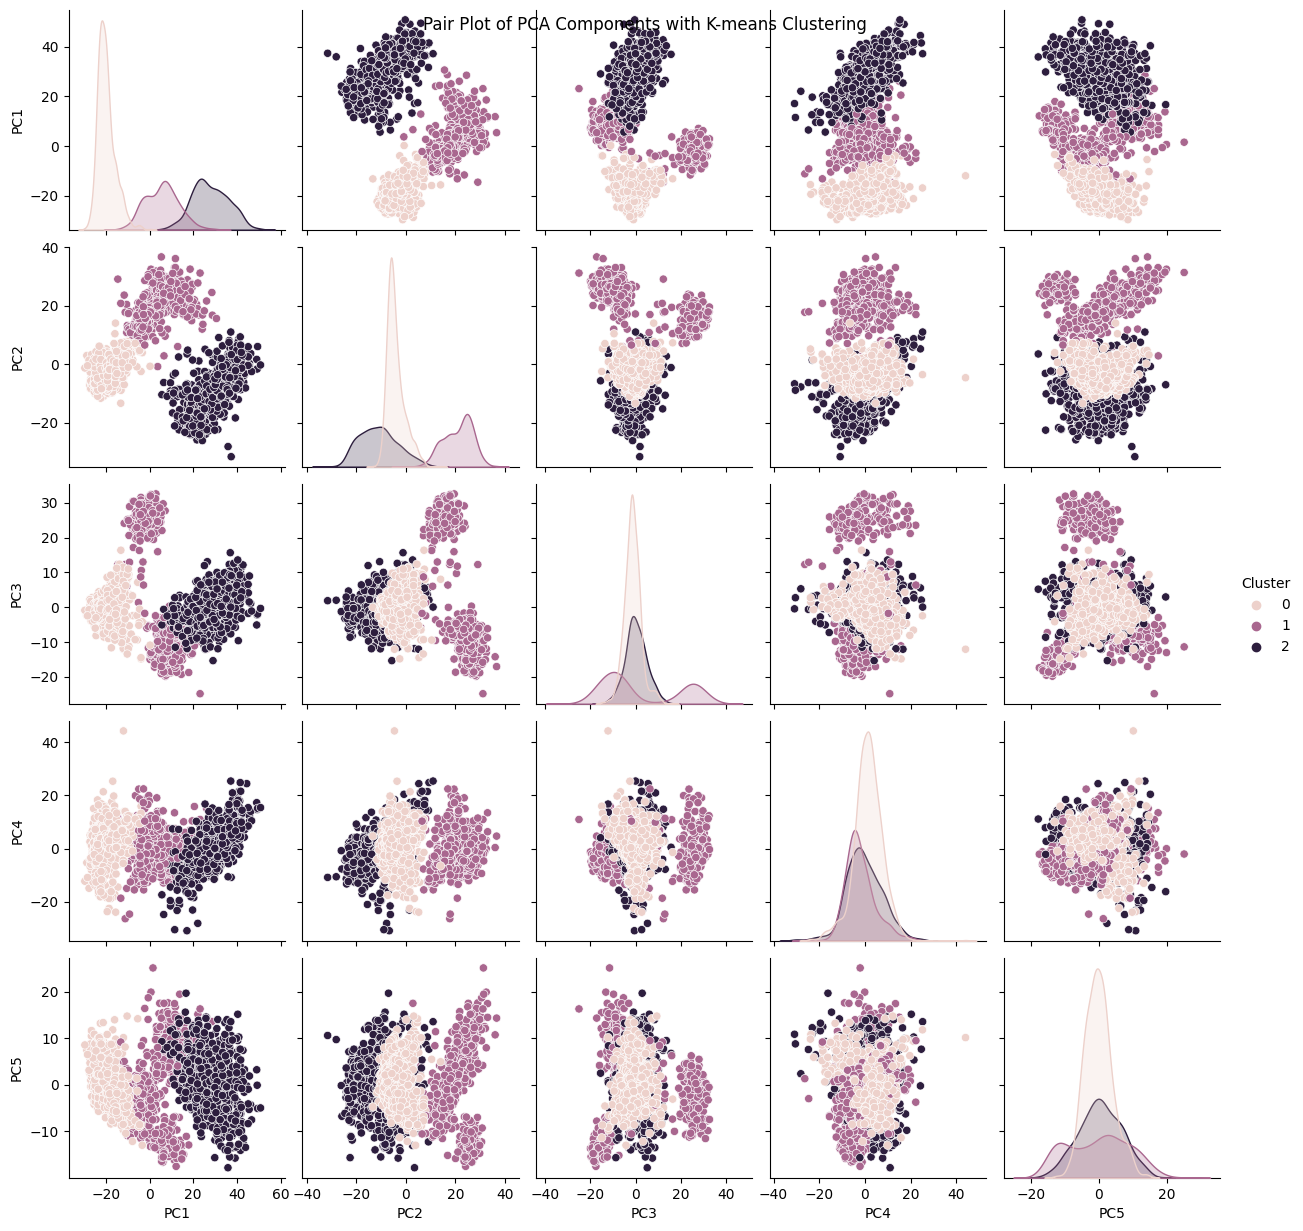

In [ ]:
import seaborn as sns
import pandas as pd

# Create a DataFrame of the first few components
pca_df = pd.DataFrame(pca_transformed_data[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['Cluster'] = cluster_labels

# Create a pair plot
sns.pairplot(pca_df, hue='Cluster', vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
plt.suptitle('Pair Plot of PCA Components with K-means Clustering')
plt.show()

## Interpreting the Pair Plot of Principal Components

The pair plot of principal components is a powerful tool for visualizing the relationships between different principal components obtained from PCA. Here's how to interpret such a plot:

### Understanding the Layout

- Each **row and column** in the pair plot corresponds to a principal component (PC).
- Off-diagonal plots are **scatter plots** representing the relationship between pairs of principal components.
- Diagonal plots are **histograms** showing the distribution of each principal component.

### Interpreting Scatter Plots

- **Scatter Plots**: Show the relationship between two principal components.
  - **Tightly Clustered Points**: Indicate that the samples are similar in terms of the two components being compared.
  - **Widely Spread Points**: Suggest a greater variance within the data in terms of the components being compared.
  - **Patterns or Trends**: Such as linear relationships or distinct groupings, can indicate correlations or inherent structures in the data.

### Interpreting Histograms

- **Histograms** (along the diagonal): Show the distribution of values for each principal component.
  - **Narrow and Tall Histograms**: Indicate that most of the data points have similar values for that component, suggesting less variability.
  - **Wide and Short Histograms**: Suggest a larger spread of values, indicating more variability in that component.

### Overall Interpretation

- The pair plot provides a comprehensive view of how each principal component relates to the others.
- It is particularly useful for spotting:
  - **Correlations**: If two components are correlated, their scatter plot might show a clear pattern (like a linear trend).
  - **Outliers**: Points that stand far away from the rest of the data in the scatter plots.
  - **Clusters**: If the data forms distinct groups, these might be visible as separate 'clouds' of points in the scatter plots.

### Biological Context

- When interpreting the pair plot in the context of RNA-Seq data:
  - Each principal component represents a 'direction' in gene expression space, with each gene contributing to varying degrees.
  - The scatter plots can hint at how different sets of genes (or conditions) covary across samples.
  - The histograms help understand the spread of the dataset along each 'direction' (principal component).

### Caveats

- While pair plots are informative, they should be interpreted in conjunction with other analyses and domain knowledge.
- In high-dimensional data like RNA-Seq, the first few principal components might not capture all the relevant biological variability, so further analysis might be required.


In [ ]:
print(pca.components_.shape)  # This will give you (n_components, n_features)


(30, 3031)


In [ ]:
print("Number of features in PCA:", pca.components_.shape[1])
print("Number of features in DataFrame:", numeric_data_pandas.shape[1])

Number of features in PCA: 3031
Number of features in DataFrame: 31053


In [ ]:
pca = PCA(n_components=5)
pca.fit(data_scaled)

PCA(n_components=5)

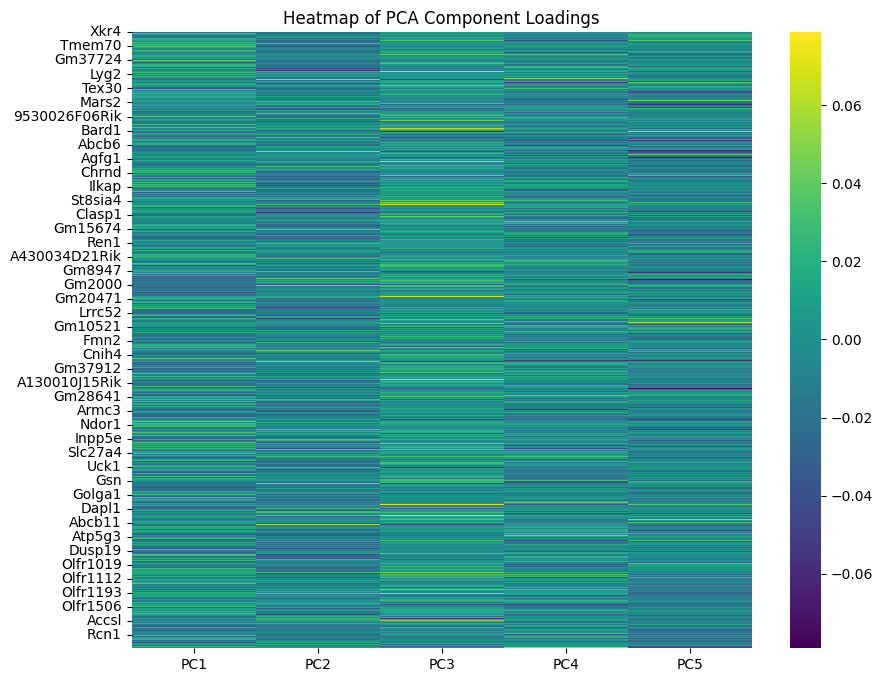

In [ ]:
# Ensure that the DataFrame index matches the PCA features
# We'll truncate the numeric_data_pandas.columns to match the number of PCA features
corrected_columns = numeric_data_pandas.columns[:3031]  # Adjust this to match the number of features in PCA

# Now create the DataFrame for the loadings with the corrected columns
loadings_df = pd.DataFrame(
    pca.components_.T,  # Transpose the PCA components
    index=corrected_columns,  # Use the corrected subset of columns
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']  # Component names
)

# Plot the heatmap of the loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='viridis')
plt.title('Heatmap of PCA Component Loadings')
plt.show()

In [ ]:
# Let's assume you have a list or set of transcription factors
known_tfs = set(["Sox17", "Nes", "Pax6", "Sox2", "Notch1", "Nr5a1", "Rfx4", "Sox9", "Hes1", "Smad1", "Sox4", "Sox18",
    "Klf7", "Sp8", "Pitx2", "Cdh1", "Klf4", "Ovol1", "Ocln", "Gsc", "Gata1", "Gata2", "Eomes", "Twist1",
    "Nkx2-5", "Mixl1", "Snai2", "Foxf1", "Hand1", "Foxc1", "Runx2", "Twist2", "Tbx6", "Snai1", "Ar", "Arid3c",
    "Atf5", "Atoh7", "Atoh8", "Bhlha15", "Cebpa", "Cebpd", "Creb3l3", "Cux2", "Dmrta1", "Elf3", "Esr1", "Fam170a",
    "Foxa1", "Foxa2", "Foxa3", "Foxq1", "Gata4", "Gata6", "Grhl1", "Hand2", "Hhex", "Hlf", "Hnf1a", "Hnf4a",
    "Hnf4g", "Irf6", "Klf15", "L3mbtl4", "Lbx2", "Lhx2", "Mlxipl", "Myrf", "Nfil3", "Nkx1-1", "Nr1h3", "Nr1h4",
    "Nr1i2", "Nr1i3", "Nr2f6", "Nr5a2", "Onecut1", "Onecut2", "Ppara", "Prox1", "Rbpjl", "Rora", "Rorc", "Sall1",
    "Six5", "Skor2", "Sox5", "Spic", "Srebf1", "Tbx15", "Tbx3", "Thap7", "Tigd2", "Tlx1", "Tshz2", "Xbp1", "Zfhx4",
    "Zfpm1", "Zglp1", "Zgpat", "Zkscan1"])



In [ ]:
top_genes_per_component = {}
n_components_to_check = 5  # Adjust as necessary
top_genes_count = 10

for i in range(n_components_to_check):
    sorted_genes = loadings_df.iloc[:, i].abs().sort_values(ascending=False)
    top_genes = sorted_genes.head(top_genes_count).index.tolist()
    top_genes_per_component[f'PC{i+1}'] = top_genes


In [ ]:
# Flatten the list of top genes from all components
top_genes_flat_list = [gene for genes in top_genes_per_component.values() for gene in genes]

# Combine with known transcription factors
genes_of_interest = set(top_genes_flat_list).union(known_tfs)

# Assuming `original_data` is your original DataFrame with gene expression data
# Filter to include only genes of interest
data_subset = original_data[genes_of_interest.intersection(original_data.columns)]



NameError: name 'original_data' is not defined

 ## Let's take a look at the top 10 genes from each principle component

 ## Identifying Influential Genes from PCA Results

After performing PCA on gene expression data, the dimensionality of the data is reduced into principal components (PCs). These components are linear combinations of all the original genes, but they do not reduce the number of genes directly. However, we can identify which genes are most influential in each principal component by examining the component loadings.

### Understanding Component Loadings

- **Component Loadings**: Each loading represents the weight or contribution of a gene to a principal component.
- **High Loadings**: Genes with higher absolute loadings (positive or negative) are more influential in that specific component.

### Steps to Identify Influential Genes

1. **Examine Loadings**: Look at the loadings for each gene in the PCA components.
2. **High Absolute Loadings**: Identify genes with the highest absolute loadings in each principal component.
3. **List Top Influential Genes**: Create a list of top influential genes for each principal component based on these loadings.

### Example Code to Identify Top Genes

```python
# Assuming pca.components_ is available and feature_names contains gene names
num_top_genes = 10  # Number of top genes to identify
loadings_df = pd.DataFrame(pca.components_, columns=feature_names)

top_genes_per_component = {}
for i in range(loadings_df.shape[0]):
    top_genes = loadings_df.iloc[i].abs().nlargest(num_top_genes).index.tolist()
    top_genes_per_component[f'PC{i+1}'] = top_genes


In [ ]:
# Assuming we are interested in the first 5 principal components
top_genes_per_component = {}
for i in range(5):  # Adjust the range if you want more or fewer components
    # Sort the loadings for the i-th component and take the absolute values
    sorted_genes = loadings_df.iloc[:, i].abs().sort_values(ascending=False)
    # Take the top 10 genes and add them to the dictionary
    top_genes_per_component[f'PC{i+1}'] = sorted_genes.head(10).index.tolist()

# Display the top genes for each component
for component, genes in top_genes_per_component.items():
    print(f"{component}: {genes}")


PC1: ['Ldlrad3', '4930532M18Rik', 'Pnpla7', 'Arhgap15', 'Olfr1212', 'Gm29100', 'Gm37724', 'Gm13580', 'Gm11084', 'Spout1']
PC2: ['4933424G06Rik', 'Map3k19', 'Ptprn', '1700019P21Rik', 'Fastkd1', 'Cspp1', 'Gm28410', 'Wipf1', 'Gm29678', 'Gm3646']
PC3: ['Ier5l', 'Pkp1', 'Trub2', 'Snhg6', 'Mastl', 'Ufc1', 'Gm8883', 'Pecr', 'Gm15834', 'Gm26603']
PC4: ['Chrna1os', 'Jph1', 'Olfr1294', 'Olfr1298', 'Lgsn', 'Dnajc1', 'Olfr1306', 'Gm37267', 'Btbd18', 'Olfr1297']
PC5: ['A830008E24Rik', 'Mybpc3', 'Gm13184', 'Gm10522', 'Pigc', 'Carlr', 'Gm15584', 'Olfr3', 'Col4a3', 'Fcmr']


'PC1': ['Gm42418','H19','Rpl41','Apoa2','Rps29','Rps28','Rbp4','Afp','Rpl37a',Rps2']
'PC2': ['Afp','Apoa2','Tmsb10','Rbp4','Rpl41','Malat1','Rps29','Dlk1','Apoe','Fabp5']
'PC3': ['mt-Atp6','mt-Co3','Malat1','mt-Nd1','Afp','mt-Cytb','Rpl41','Rps29','mt-Co1','mt-Co2'],
'PC4': ['mt-Atp6','mt-Co3','mt-Nd1','mt-Cytb','mt-Co1','mt-Co2','Afp','Rps29','Gm42418','Rpl41']
'PC5': ['Malat1','Actb','Rpl41','Hbb-y','Ttr','Tmsb10','Ppia','Rps8','Rplp0','Eef1a1']

s the top 10 genes from each component are:
PC1: ['Ldlrad3', '4930532M18Rik', 'Pnpla7', 'Arhgap15', 'Olfr1212', 'Gm29100', 'Gm37724', 'Gm13580', 'Gm11084', 'Spout1']

PC2: ['4933424G06Rik', 'Map3k19', 'Ptprn', '1700019P21Rik', 'Fastkd1', 'Cspp1', 'Gm28410', 'Wipf1', 'Gm29678', 'Gm3646']

PC3: ['Ier5l', 'Pkp1', 'Trub2', 'Snhg6', 'Mastl', 'Ufc1', 'Gm8883', 'Pecr', 'Gm15834', 'Gm26603']

PC4: ['Chrna1os', 'Jph1', 'Olfr1294', 'Olfr1298', 'Lgsn', 'Dnajc1', 'Olfr1306', 'Gm37267', 'Btbd18', 'Olfr1297']

PC5: ['A830008E24Rik', 'Mybpc3', 'Gm13184', 'Gm10522', 'Pigc', 'Carlr', 'Gm15584', 'Olfr3', 'Col4a3', 'Fcmr']